In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math
import pandas_datareader as web

In [106]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [107]:
db = pd.read_csv('historic_data/csv/TCS.NS.csv')
db['Date'] = pd.to_datetime(db['Date'], format='%d-%m-%Y')
db['Date'] = db['Date'].dt.strftime('%Y-%m-%d')
# train_size = int(len(data) * 0.8) 
# train_df = data[:train_size].dropna(how='any', axis=0)
# test_df = data[train_size:].dropna(how='any', axis=0)
db.head()

data = db[['Adjusted Close']]
data.columns = ['Price']
data.tail()

,Price
5133,3122.300049
5134,3115.899902
5135,3138.899902
5136,3205.899902
5137,3200.000000


In [108]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 5138 number of days in the dataset.


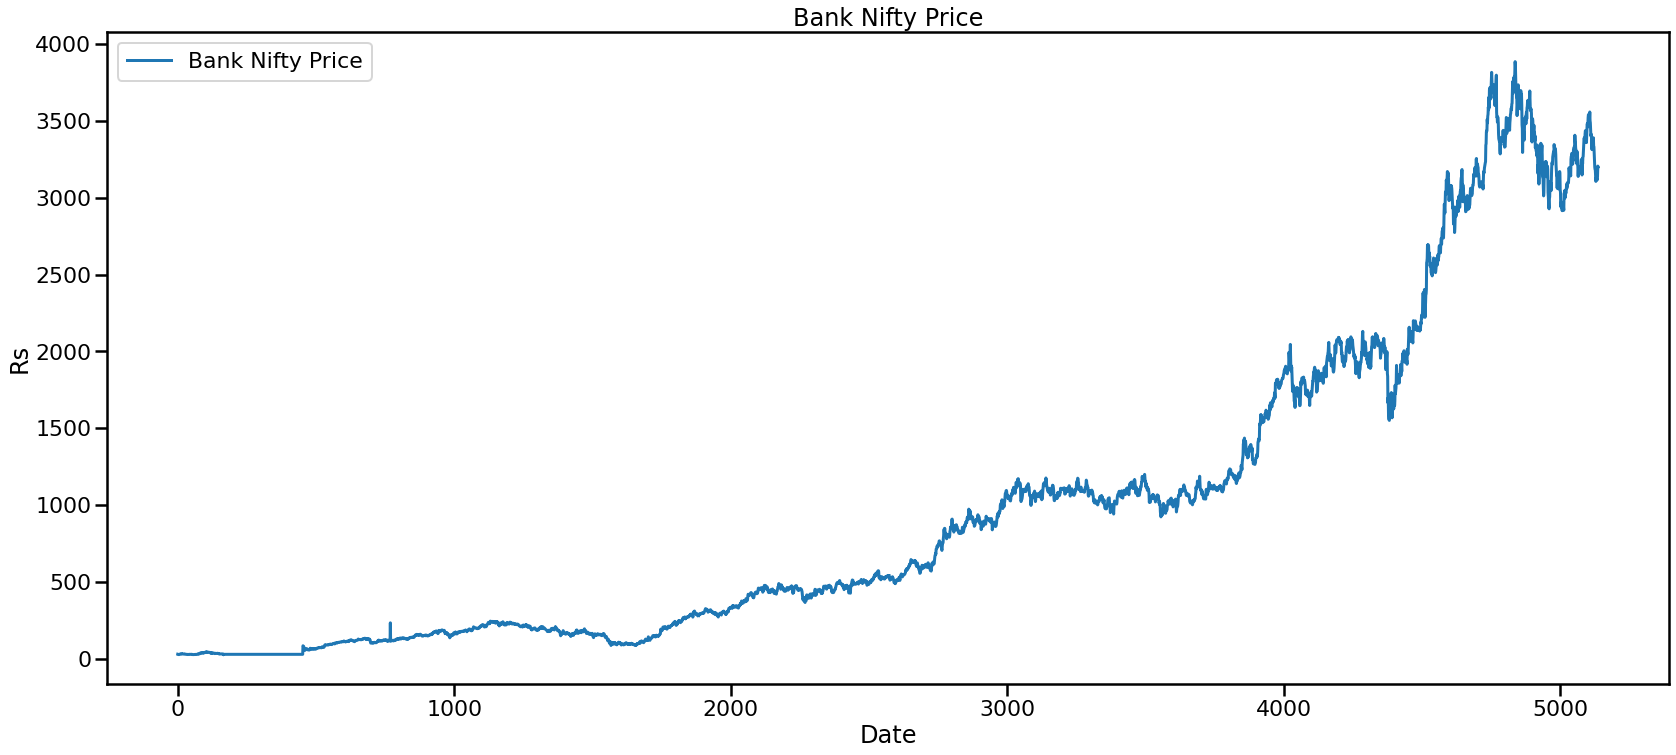

In [109]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(data.index, data['Price'], label='Bank Nifty Price')
plt.xlabel('Date')
plt.ylabel('Rs')
plt.title('Bank Nifty Price')
plt.legend()
plt.show()

In [110]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Price'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Price'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema']-dataset['26ema']

    # Create Bollinger Bands
    dataset['20sd'] = dataset['Price'].rolling(window = 21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Price']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])
    return dataset

In [111]:
df = get_technical_indicators(data)

C:\Users\prath\AppData\Local\Temp\ipykernel_14928\3515336175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ma7'] = dataset['Price'].rolling(window=7).mean()
C:\Users\prath\AppData\Local\Temp\ipykernel_14928\3515336175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ma21'] = dataset['Price'].rolling(window=21).mean()
C:\Users\prath\AppData\Local\Temp\ipykernel_14928\3515336175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [112]:
df = df.dropna()
df.head()

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
20,29.372902,30.728477,28.900548,29.517093,29.969121,0.452028,1.985931,32.872410,24.928685,29.632567,28.372902,3.345435
21,29.372902,30.409442,28.942829,29.504005,29.875009,0.371005,1.986094,32.915016,24.970642,29.459457,28.372902,3.345435
22,30.117313,30.150629,29.038923,29.558761,29.913104,0.354343,1.992051,33.023026,25.054820,29.898028,29.117313,3.371333
23,30.269796,30.127568,29.234529,29.621291,29.968994,0.347703,1.894738,33.024005,25.445054,30.145874,29.269796,3.376556
24,29.408775,29.886689,29.389134,29.602857,29.881462,0.278605,1.759105,32.907344,25.870924,29.654475,28.408775,3.346698


In [113]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

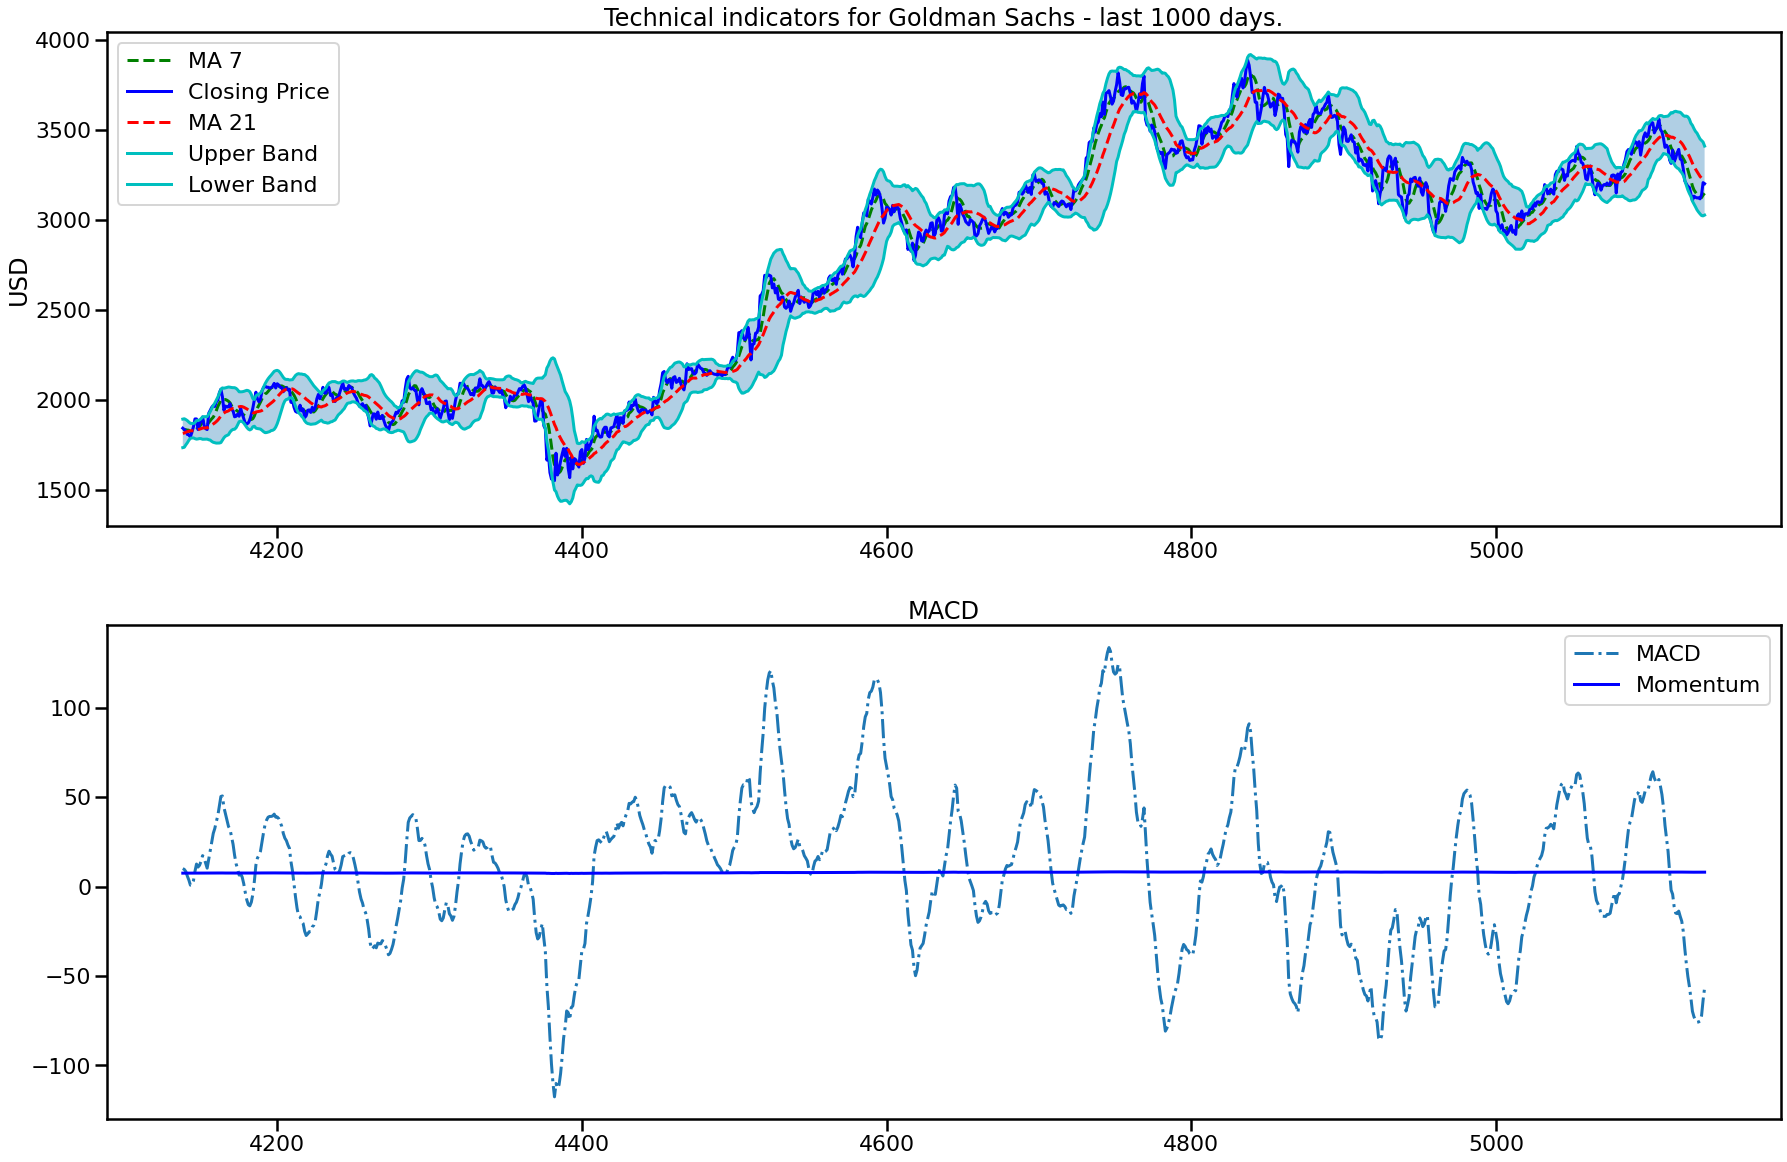

In [114]:
plot_technical_indicators(df, 1000)

Text(0.5, 1.0, 'Params')

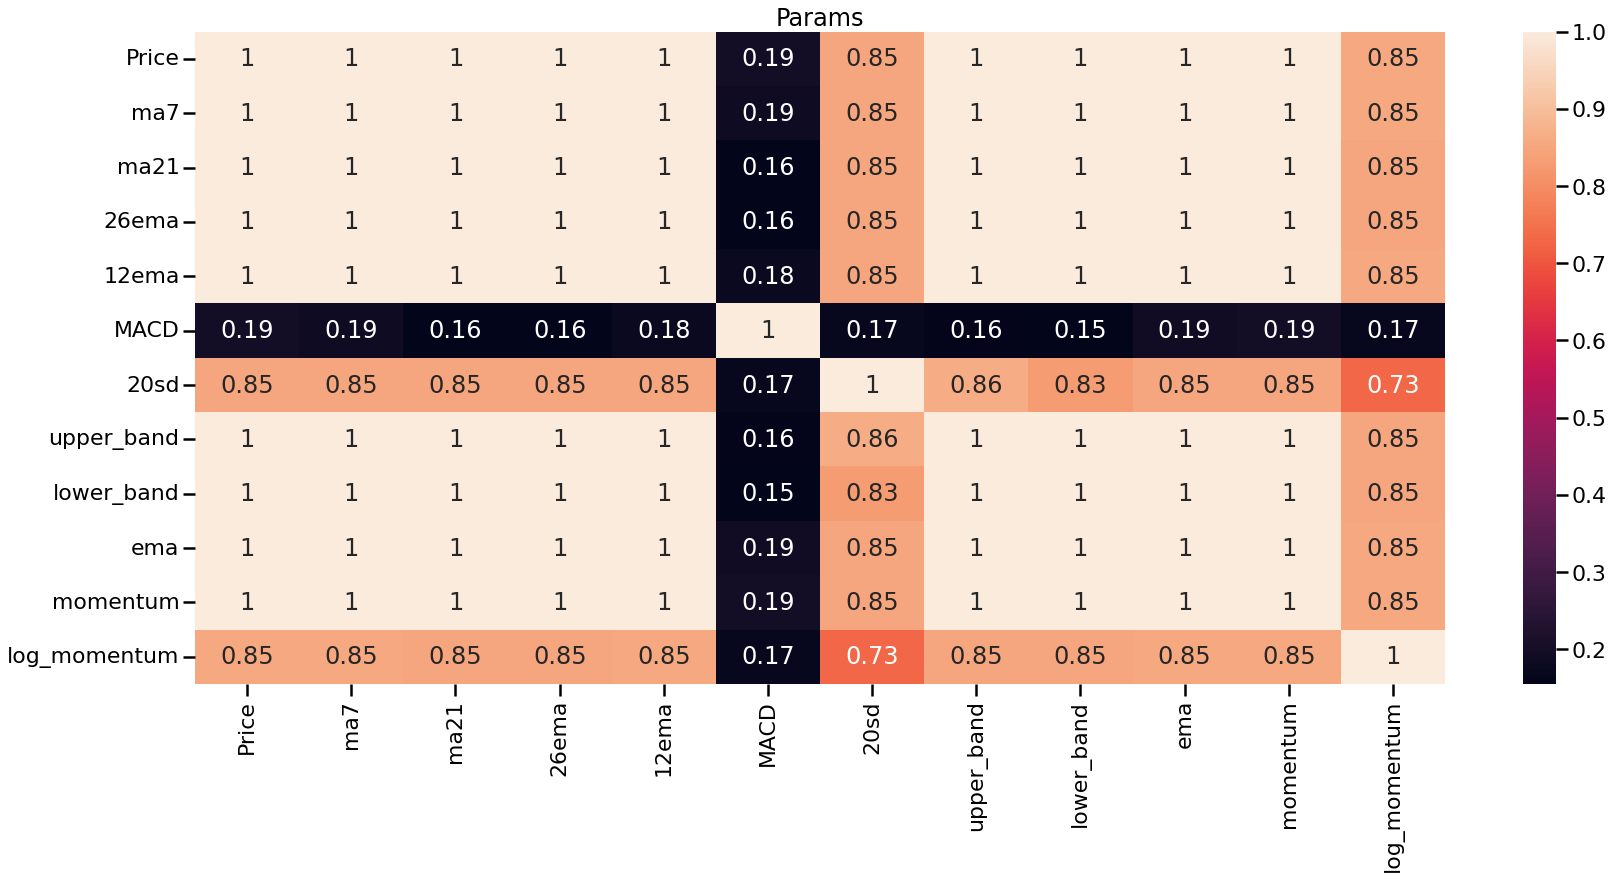

In [115]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(df.corr(), annot = True).set_title('Params')


In [116]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 4929 samples, and 12 features.


In [117]:
df.columns

Index(['Price', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum'],
      dtype='object')

In [118]:
df

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
20,29.372902,30.728477,28.900548,29.517093,29.969121,0.452028,1.985931,32.872410,24.928685,29.632567,28.372902,3.345435
21,29.372902,30.409442,28.942829,29.504005,29.875009,0.371005,1.986094,32.915016,24.970642,29.459457,28.372902,3.345435
22,30.117313,30.150629,29.038923,29.558761,29.913104,0.354343,1.992051,33.023026,25.054820,29.898028,29.117313,3.371333
23,30.269796,30.127568,29.234529,29.621291,29.968994,0.347703,1.894738,33.024005,25.445054,30.145874,29.269796,3.376556
24,29.408775,29.886689,29.389134,29.602857,29.881462,0.278605,1.759105,32.907344,25.870924,29.654475,28.408775,3.346698
...,...,...,...,...,...,...,...,...,...,...,...,...
5133,3122.300049,3132.421456,3253.919050,3255.770306,3180.107019,-75.663287,105.548991,3465.017032,3042.821068,3122.293438,3121.300049,8.046005
5134,3115.899902,3123.364293,3240.369048,3245.409535,3170.229001,-75.180534,104.051458,3448.471963,3032.266132,3118.031081,3114.899902,8.043952
5135,3138.899902,3122.735700,3231.180943,3237.519933,3165.409140,-72.110793,104.088538,3439.358019,3023.003867,3131.943628,3137.899902,8.051309
5136,3205.899902,3136.992815,3226.088077,3235.177708,3171.638488,-63.539220,102.497091,3431.082258,3021.093895,3181.247811,3204.899902,8.072436


In [119]:
# Find the index value for the row where the 'Date' column equals '2019-01-31'
index_value = db.index[db['Date'] == '2019-01-31'][0]

data_training = df[df.index < index_value].copy()
data_training

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
20,29.372902,30.728477,28.900548,29.517093,29.969121,0.452028,1.985931,32.872410,24.928685,29.632567,28.372902,3.345435
21,29.372902,30.409442,28.942829,29.504005,29.875009,0.371005,1.986094,32.915016,24.970642,29.459457,28.372902,3.345435
22,30.117313,30.150629,29.038923,29.558761,29.913104,0.354343,1.992051,33.023026,25.054820,29.898028,29.117313,3.371333
23,30.269796,30.127568,29.234529,29.621291,29.968994,0.347703,1.894738,33.024005,25.445054,30.145874,29.269796,3.376556
24,29.408775,29.886689,29.389134,29.602857,29.881462,0.278605,1.759105,32.907344,25.870924,29.654475,28.408775,3.346698
...,...,...,...,...,...,...,...,...,...,...,...,...
4102,1731.410278,1723.345354,1716.293242,1726.994052,1719.118220,-7.875831,22.675156,1761.643554,1670.942930,1726.268294,1730.410278,7.456114
4103,1748.937744,1730.453997,1716.984067,1728.619510,1723.705839,-4.913671,23.462671,1763.909408,1670.058726,1741.381261,1747.937744,7.466192
4104,1780.077515,1738.349522,1719.715873,1732.431214,1732.378405,-0.052809,27.204064,1774.124000,1665.307745,1767.178763,1779.077515,7.483850
4105,1805.344727,1749.028669,1723.780675,1737.832215,1743.603993,5.771778,33.004905,1789.790485,1657.770864,1792.622739,1804.344727,7.497953


In [120]:
data_testing = df[df.index >= index_value].copy()
data_testing

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
4107,1833.889648,1773.079590,1731.480387,1749.493749,1765.371313,15.877563,43.893277,1819.266940,1643.693834,1822.687927,1832.889648,7.513649
4108,1848.321289,1793.156651,1737.293166,1756.814308,1778.132847,21.318540,50.718492,1838.730150,1635.856183,1839.776835,1847.321289,7.521492
4109,1866.805176,1812.498779,1744.985567,1764.961780,1791.774744,26.812965,57.424828,1859.835222,1630.135911,1857.795729,1865.805176,7.531448
4110,1861.615112,1828.595546,1751.520078,1772.121286,1802.519416,30.398130,62.543509,1876.607095,1626.433060,1860.341984,1860.615112,7.528662
4111,1889.158691,1844.178571,1759.554391,1780.790723,1815.848535,35.057812,68.868191,1897.290773,1621.818009,1879.553122,1888.158691,7.543357
...,...,...,...,...,...,...,...,...,...,...,...,...
5133,3122.300049,3132.421456,3253.919050,3255.770306,3180.107019,-75.663287,105.548991,3465.017032,3042.821068,3122.293438,3121.300049,8.046005
5134,3115.899902,3123.364293,3240.369048,3245.409535,3170.229001,-75.180534,104.051458,3448.471963,3032.266132,3118.031081,3114.899902,8.043952
5135,3138.899902,3122.735700,3231.180943,3237.519933,3165.409140,-72.110793,104.088538,3439.358019,3023.003867,3131.943628,3137.899902,8.051309
5136,3205.899902,3136.992815,3226.088077,3235.177708,3171.638488,-63.539220,102.497091,3431.082258,3021.093895,3181.247811,3204.899902,8.072436


In [121]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(3898, 12)


array([[0.0018077 , 0.00225967, 0.00117977, ..., 0.00185209, 0.0018077 ,
        0.03119318],
       [0.0018077 , 0.00209668, 0.00120215, ..., 0.0017654 , 0.0018077 ,
        0.03119318],
       [0.00217634, 0.00196445, 0.00125301, ..., 0.00198504, 0.00217634,
        0.03705924],
       ...,
       [0.86878799, 0.87468653, 0.89611025, ..., 0.87205082, 0.86878799,
        0.96855441],
       [0.88130076, 0.88014253, 0.89826171, ..., 0.88479369, 0.88130076,
        0.97174866],
       [0.88069196, 0.88497387, 0.9001589 , ..., 0.88863085, 0.88069196,
        0.97159429]])

In [122]:
X_train = []
y_train = []

In [123]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [124]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((3838, 60, 12), (3838,))

In [125]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 12)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [126]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            12600     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [127]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [128]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50
60/60 [==============================] - 25s 336ms/step - loss: 0.0152
Epoch 2/50
60/60 [==============================] - 23s 389ms/step - loss: 0.0050
Epoch 3/50
60/60 [==============================] - 22s 367ms/step - loss: 0.0042
Epoch 4/50
60/60 [==============================] - 23s 382ms/step - loss: 0.0034
Epoch 5/50
60/60 [==============================] - 23s 387ms/step - loss: 0.0031
Epoch 6/50
60/60 [==============================] - 22s 369ms/step - loss: 0.0032
Epoch 7/50
60/60 [==============================] - 23s 375ms/step - loss: 0.0027
Epoch 8/50
60/60 [==============================] - 23s 380ms/step - loss: 0.0029
Epoch 9/50
60/60 [==============================] - 21s 355ms/step - loss: 0.0026
Epoch 10/50
60/60 [==============================] - 23s 382ms/step - loss: 0.0024
Epoch 11/50
60/60 [==============================] - 23s 384ms/step - loss: 0.0023
Epoch 12/50
60/60 [==============================] - 23s 384ms/step - loss: 0.0027
Epoch 13/50
6

In [129]:
past_60 = data_training.tail(60)

dt = past_60.append(data_testing, ignore_index = True)
dt

C:\Users\prath\AppData\Local\Temp\ipykernel_14928\175218773.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = past_60.append(data_testing, ignore_index = True)


,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,1717.984863,1718.913121,1757.169672,1771.736644,1734.340199,-37.396445,74.307444,1905.784559,1608.554785,1726.519224,1716.984863,7.448325
1,1756.008911,1736.253941,1750.007888,1770.571627,1737.673847,-32.897780,65.986576,1881.981040,1618.034736,1746.179015,1755.008911,7.470229
2,1764.594971,1745.488961,1744.338664,1770.128911,1741.815558,-28.313353,58.635545,1861.609754,1627.067574,1758.456319,1763.594971,7.475110
3,1734.657471,1747.358015,1736.628616,1767.501397,1740.714314,-26.787084,47.134918,1830.898451,1642.358780,1742.590420,1733.657471,7.457989
4,1739.790649,1744.333723,1731.244007,1765.448749,1740.572212,-24.876538,38.938202,1809.120411,1653.367603,1740.723906,1738.790649,7.460945
...,...,...,...,...,...,...,...,...,...,...,...,...
1086,3122.300049,3132.421456,3253.919050,3255.770306,3180.107019,-75.663287,105.548991,3465.017032,3042.821068,3122.293438,3121.300049,8.046005
1087,3115.899902,3123.364293,3240.369048,3245.409535,3170.229001,-75.180534,104.051458,3448.471963,3032.266132,3118.031081,3114.899902,8.043952
1088,3138.899902,3122.735700,3231.180943,3237.519933,3165.409140,-72.110793,104.088538,3439.358019,3023.003867,3131.943628,3137.899902,8.051309
1089,3205.899902,3136.992815,3226.088077,3235.177708,3171.638488,-63.539220,102.497091,3431.082258,3021.093895,3181.247811,3204.899902,8.072436


In [130]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(1091, 12)


array([[0.07181875, 0.05633051, 0.05606088, ..., 0.07427199, 0.07181875,
        0.11182364],
       [0.08809937, 0.06416241, 0.05262092, ..., 0.08279878, 0.08809937,
        0.13565069],
       [0.09177563, 0.06833336, 0.04989786, ..., 0.08812366, 0.09177563,
        0.14095951],
       ...,
       [0.68020684, 0.69036042, 0.7640619 , ..., 0.68382878, 0.68020684,
        0.76774123],
       [0.70889399, 0.69679958, 0.76161568, ..., 0.70521285, 0.70889399,
        0.79072299],
       [0.70636785, 0.70126442, 0.75736826, ..., 0.71063495, 0.70636785,
        0.78871864]])

In [143]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1031, 60, 12), (1031,))

In [145]:
y_pred = regressor.predict(X_test)

33/33 [==============================] - 2s 40ms/step


In [133]:
y_pred

array([[0.08111218],
       [0.08119301],
       [0.08147347],
       ...,
       [0.5771762 ],
       [0.5721253 ],
       [0.567599  ]], dtype=float32)

In [134]:
scale = 1/scalar.scale_[0]

In [135]:
y_pred = y_pred*scale
y_test = y_test*scale

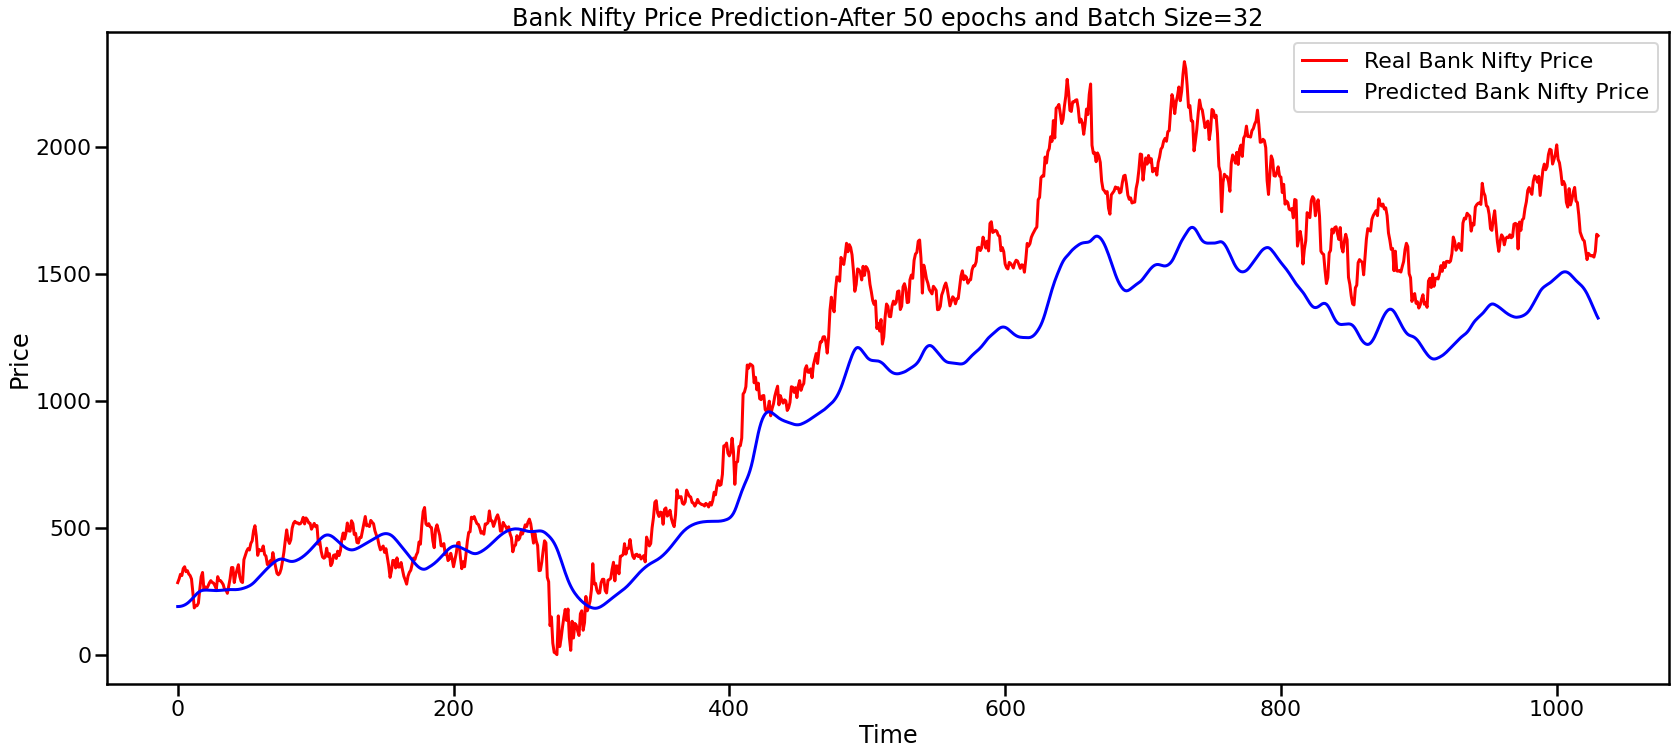

In [138]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [141]:
y_pred

array([[ 189.44078],
       [ 189.62958],
       [ 190.28459],
       ...,
       [1348.0184 ],
       [1336.2218 ],
       [1325.6505 ]], dtype=float32)